In [29]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
wine = pd.read_csv('wine.csv')


In [2]:
y = wine['quality']
X = wine.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE', round(mae,2))


MAE 0.42


In [13]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

100%|===================| 976/980 [00:18<00:00]        

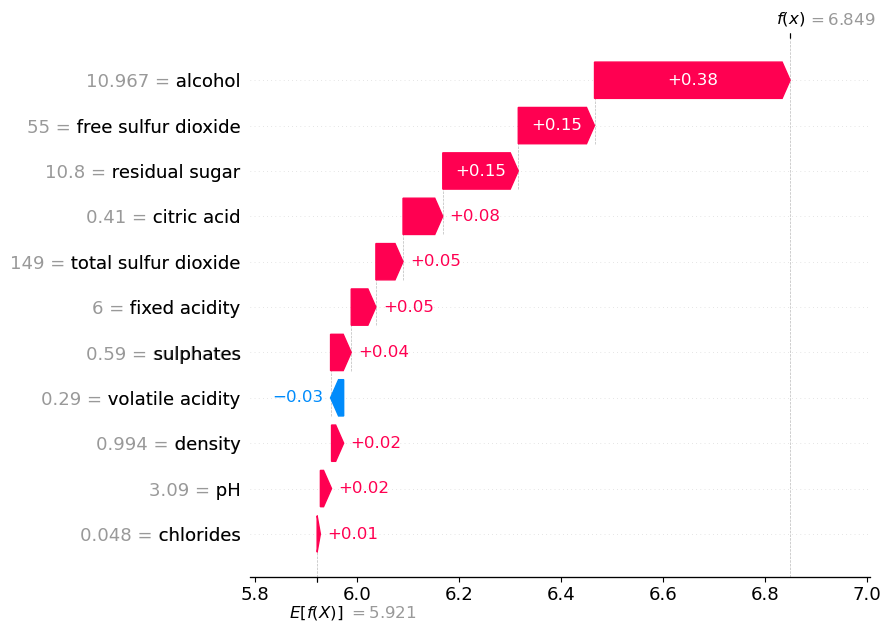

In [15]:
shap.plots.waterfall(shap_values[0],  max_display=11)

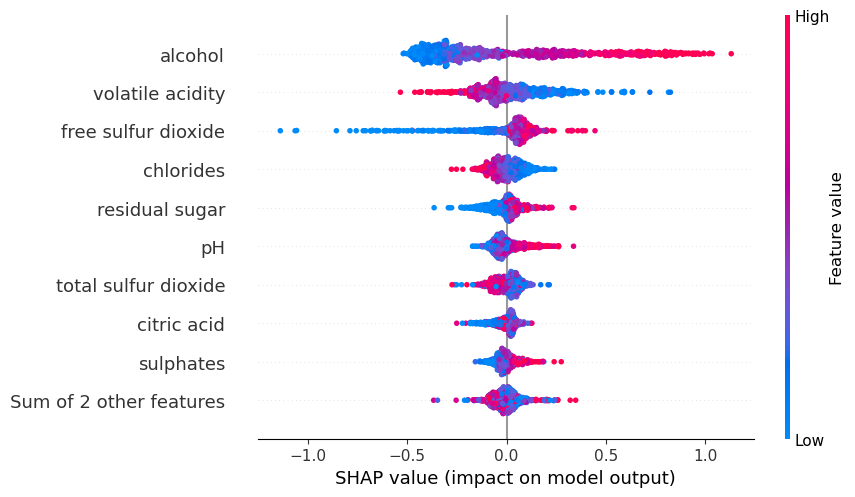

In [16]:
shap.plots.beeswarm(shap_values)

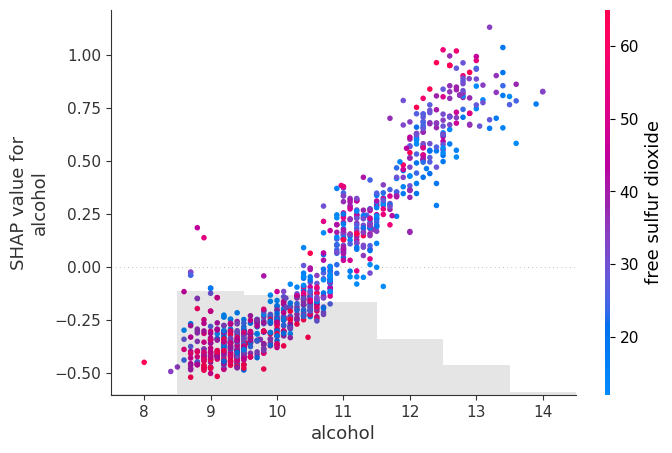

In [18]:
shap.plots.scatter(shap_values[:, 'alcohol'], color=shap_values)

<Axes: >

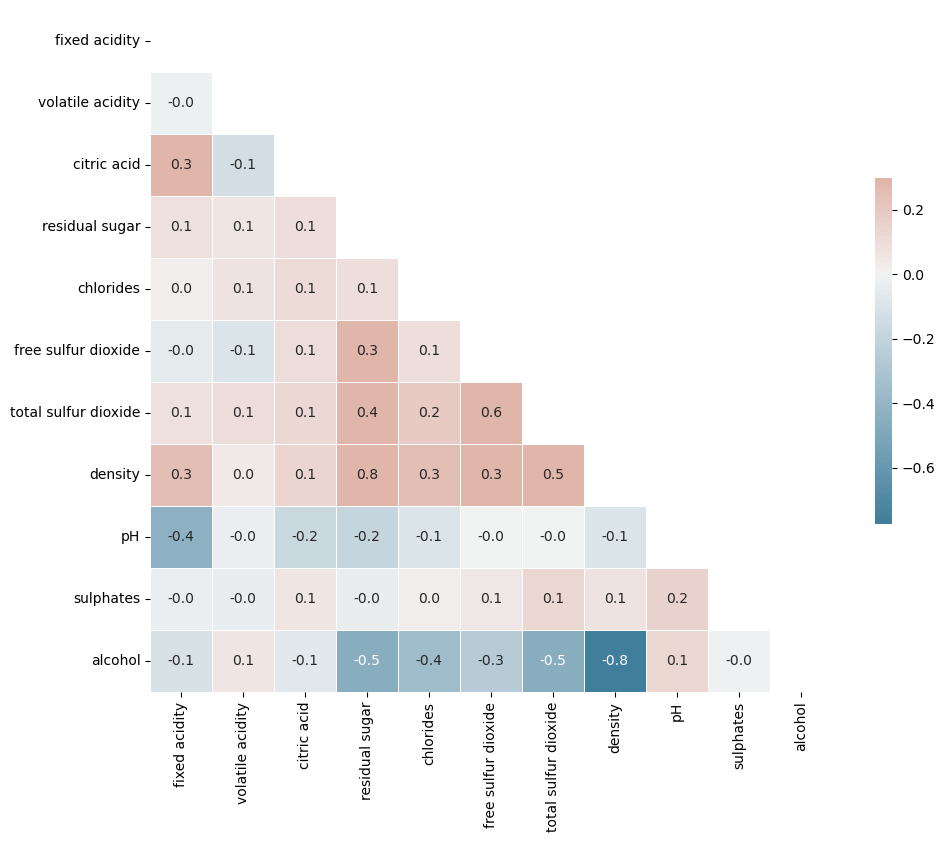

In [27]:
corr    = X_train.corr()
mask    = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
cmap    = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')

In [24]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True],
       [False, False, False, False, False, False, False, Fal